In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [6]:
df=pd.read_csv('Housing.csv')
print("dataset shape:", df.shape)
df.head()

dataset shape: (545, 13)


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [7]:
#first i want to check for missing values and find out the data types
print(df.info())
print("\n missing values in each column:\n", df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB
None

 missing values in each column:
 price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainr

there are no missing values

In [8]:
df=pd.get_dummies(df, drop_first=True)
print("After encoding shape:", df.shape)
df.head()

After encoding shape: (545, 14)


,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,True,False,False,False,True,True,False,False
1,12250000,8960,4,4,4,3,True,False,False,False,True,False,False,False
2,12250000,9960,3,2,2,2,True,False,True,False,False,True,True,False
3,12215000,7500,4,2,2,3,True,False,True,False,True,True,False,False
4,11410000,7420,4,1,2,2,True,True,True,False,True,False,False,False


In [14]:
#scaling
scaler=StandardScaler()
df_scaled=pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
print("\nAfter scaling:")
df_scaled.head()


After scaling:


,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,4.566365,1.046726,1.403419,1.421812,1.378217,1.517692,0.405623,-0.465315,-0.734539,-0.219265,1.472618,1.804941,-0.844888,-0.696429
1,4.004484,1.757010,1.403419,5.405809,2.532024,2.679409,0.405623,-0.465315,-0.734539,-0.219265,1.472618,-0.554035,-0.844888,-0.696429
2,4.004484,2.218232,0.047278,1.421812,0.224410,1.517692,0.405623,-0.465315,1.361397,-0.219265,-0.679063,1.804941,1.183588,-0.696429
3,3.985755,1.083624,1.403419,1.421812,0.224410,2.679409,0.405623,-0.465315,1.361397,-0.219265,1.472618,1.804941,-0.844888,-0.696429
4,3.554979,1.046726,1.403419,-0.570187,0.224410,1.517692,0.405623,2.149083,1.361397,-0.219265,1.472618,-0.554035,-0.844888,-0.696429


In [15]:
target='price'
X=df_scaled.drop(columns=[target],axis=1)
y=df_scaled[target]

In [16]:
#split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("\nTraining set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (436, 13)
Testing set shape: (109, 13)


In [17]:
model=LinearRegression()
model.fit(X_train, y_train)
y_pred=model.predict(X_test)

In [18]:
#evalution metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.3f}")
print(f"Mean Squared Error (MSE): {mse:.3f}")
print(f"R² Score: {r2:.3f}")

Mean Absolute Error (MAE): 0.519
Mean Squared Error (MSE): 0.502
R² Score: 0.653


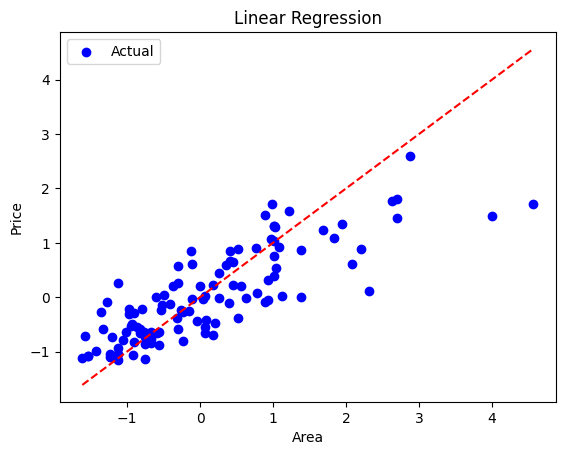

In [19]:
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred,color='blue',label='Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Linear Regression')
plt.legend()
plt.show()


In [21]:
intercept=model.intercept_

coefficients=model.coef_
features=X_train.columns

equation=f"price={intercept:.2f}"
for feature,coef in zip(features, coefficients):
    equation+=f"+({coef:.2f}*{feature})"

print("Regression Line:")
print(equation)

Regression Line:
price=-0.02+(0.27*area)+(0.03*bedrooms)+(0.29*bathrooms)+(0.19*stories)+(0.10*parking)+(0.07*mainroad_yes)+(0.05*guestroom_yes)+(0.10*basement_yes)+(0.08*hotwaterheating_yes)+(0.20*airconditioning_yes)+(0.14*prefarea_yes)+(-0.03*furnishingstatus_semi-furnished)+(-0.10*furnishingstatus_unfurnished)
